# 1.2 Basic Grammer

## 1.2.1 Variables and Basic Operations

In [1]:
x = 3
y = 1.2
z = "Hi!"

"Hi!"

In [2]:
typeof(x)

Int64

In [3]:
typeof(y)

Float64

In [4]:
typeof(z)

String

In [5]:
x + 1

4

### Unicode input https://docs.julialang.org/en/v1/manual/unicode-input/

In [6]:
# ギリシャ文字
μ = 0.0 #(\mu)
σ = 2.0 #(\sigma)
# 下付き
xᵢ = 0 #(x\_i)
# 上付き
σ² = σ^2 #(\sigma\^2)

4.0

## 1.2.2 Control Syntax

In [7]:
x = 1.0
y = 2.0
if x < y
    println(" x is less than y. ")
elseif x ==y
    println("x is equal to y. ")
else
    println("x is greater than y. ")
end

 x is less than y. 


In [8]:
x = -3
y = x < 0 ? "T" : "F" # Ternary operator
println(y)

T


In [9]:
a = 0
b = 0
true && (a = 1) # Short-Circuit Evaluation
true || (b = 1)
println("a = $(a), b = $(b)")

a = 1, b = 0


In [10]:
for i in 1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


## 1.2.3 Function

In [11]:
myinv(x) = 1/x

myinv (generic function with 1 method)

In [12]:
myinv(3)

0.3333333333333333

In [13]:
function myinv(x)
    return 1/x    # returnは省略可能
end

myinv (generic function with 1 method)

In [14]:
function mymean(x, y)
    return (x + y) / 2
end

mymean (generic function with 1 method)

In [15]:
mymean(1.0, 2.0)

1.5

## 1.2.4 Array

In [16]:
a = [1, 2, 3] # 縦ベクトル（, ~カンマ~で区切る）

3-element Vector{Int64}:
 1
 2
 3

In [17]:
b = [1, 2, 3] # 横ベクトル（" "~スペースで区切る），1x3行列とみなされる

3-element Vector{Int64}:
 1
 2
 3

In [18]:
c = Array{Float64}(undef, 3) # 各要素がFloat64型の配列を，値を初期化せずにメモリ上に確保

3-element Vector{Float64}:
 1.5e-322
 1.53e-322
 2.453262941e-314

In [19]:
d = zeros(3) # zeros関数 ゼロを並べた配列

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [20]:
e = ones(3) # ones関数 1を並べた配列

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [21]:
f = rand(3) # rand関数 0~1までの一様にランダムな実数を生成

3-element Vector{Float64}:
 0.5355763765410656
 0.4882928748999852
 0.38814110381348843

In [22]:
g = randn(3) # randn関数 平均0，標準偏差1の正規分布から乱数を得る

3-element Vector{Float64}:
 -0.5799158478761592
  0.9731463176443382
  0.7371113686103378

In [23]:
A = [1 2 3 4; 
     5 6 7 8] # 2x4サイズの行列

2×4 Matrix{Int64}:
 1  2  3  4
 5  6  7  8

In [24]:
B = ones(2, 4)

2×4 Matrix{Float64}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

In [25]:
size(A) # size関数 行列のサイズを得る

(2, 4)

In [26]:
length(A) # lenngth関数 ベクトルや行列の要素の個数を得る

8

In [27]:
A[2, 1] # 2行, 1列目の要素を出力

5

In [28]:
A[2, :] # 2行目を配列として出力

4-element Vector{Int64}:
 5
 6
 7
 8

In [29]:
A[:, 1] # 1行目を配列として出力

2-element Vector{Int64}:
 1
 5

In [30]:
A[:, 1:3] # 1~3列目を部分行列として出力

2×3 Matrix{Int64}:
 1  2  3
 5  6  7

In [31]:
[2*i for i in 1:5] # ループを使って配列を生成

5-element Vector{Int64}:
  2
  4
  6
  8
 10

In [32]:
[i*j for i in 1:3, j in 1:4] # ループを2つ回して行列を生成

3×4 Matrix{Int64}:
 1  2  3   4
 2  4  6   8
 3  6  9  12

In [33]:
params = (1, 2, 3) #タプル（tuple）

(1, 2, 3)

In [34]:
func(a, b, c) = a + b + c
func(params...)

6

## 1.2.5 Broadcast

In [35]:
a = [1, 2, 3] # 縦ベクトル
a + 1         # エラーが出る例

LoadError: MethodError: no method matching +(::Vector{Int64}, ::Int64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  +([91m::T[39m, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:87
[0m  +([91m::Rational[39m, ::Integer) at rational.jl:313
[0m  ...

In [36]:
a .+ 1  # Juliaではドット（.）を付けた.+演算子は要素毎の計算を行うことを意味する．

3-element Vector{Int64}:
 2
 3
 4

In [37]:
function add_one(x) # 与えられた変数に対して1を加える関数
    x + 1
end
add_one(1.0)

2.0

In [38]:
add_one.([1, 2, 3]) # 配列の各要素に関して計算するために，add_one関数にドットを付けて，add_one. とする．

3-element Vector{Int64}:
 2
 3
 4

## 1.2.4 Anonymous function

In [39]:
x -> x + 1

#5 (generic function with 1 method)

In [40]:
map(x -> x + 1, [1, 2, 3]) # map関数

3-element Vector{Int64}:
 2
 3
 4

## 1.2.7 Macro

In [41]:
function test(maxiter)
    a = []
    for i in 1:maxiter
        push!(a, randn())
    end
    sum(a)
end
@time test(100000)

  0.007323 seconds (201.39 k allocations: 4.962 MiB, 36.87% compilation time)


-113.10355063932761

## 1.4 Graph Drawing

https://matplotlib.org/stable/

In [42]:
using PyPlot #大文字小文字に注意

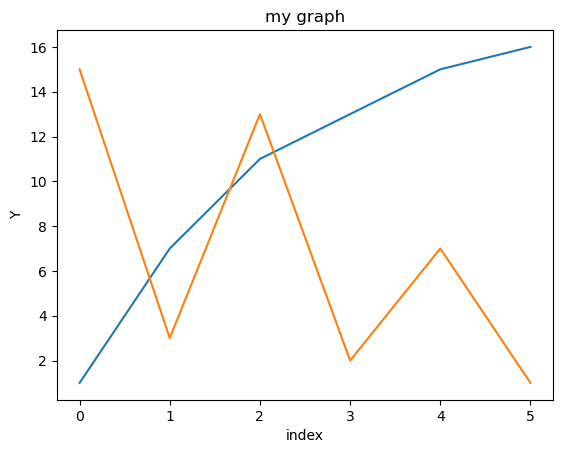

PyObject Text(0.5, 1.0, 'my graph')

In [43]:
# 1st Data
Y1 = [1, 7, 11, 13, 15, 16] # 縦ベクトル

# 2nd Data
Y2 = [15, 3, 13, 2, 7, 1]   # 縦ベクトル

# Make a graph
fig, ax = subplots()

# Line graph
ax.plot(Y1)
ax.plot(Y2)

# Axis name
ax.set_xlabel("index")
ax.set_ylabel("Y")

# Graph title
ax.set_title("my graph")

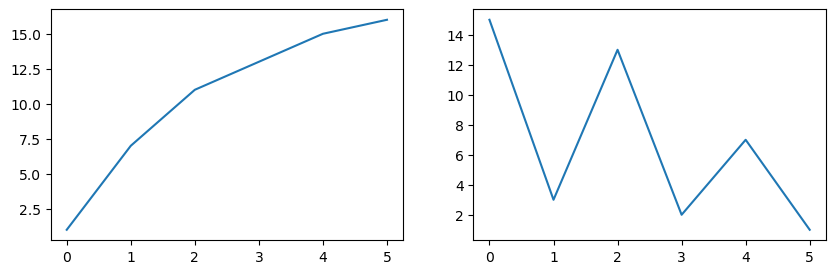

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa63428b400>

In [44]:
fig, axes = subplots(1, 2, figsize=(10, 3)) # figsize: グラフの大きさ調整
axes[1].plot(Y1)
axes[2].plot(Y2)

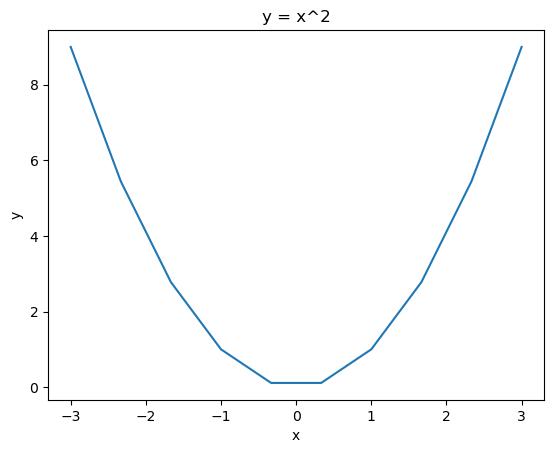

PyObject Text(0.5, 1.0, 'y = x^2')

In [45]:
# Definition of a quadratic function
func(x) = x^2  # funcでなくfとすると "cannot define function f; it already has a value"というエラーが出る...

# Generate 10 evenly spaced point sequences from -3 to 3
xs = range(-3, 3, length = 10)

fig, ax = subplots()

# Drawing a function
ax.plot(xs, func.(xs), "-")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = x^2")

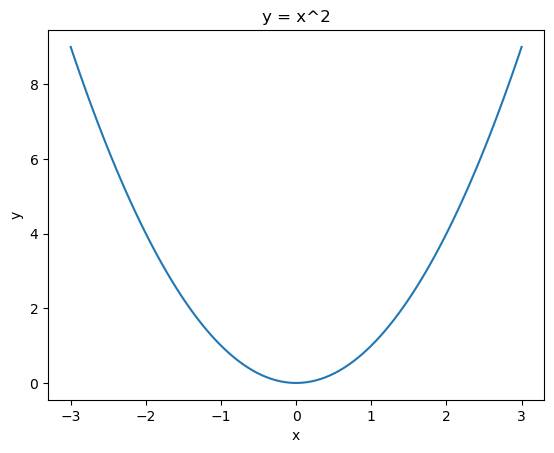

PyObject Text(0.5, 1.0, 'y = x^2')

In [46]:
func(x) = x^2

xs = range(-3, 3, length = 100)

fig, ax = subplots()

ax.plot(xs, func.(xs), "-")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = x^2")

### Cycloid formula
$$
    x(\theta) = r (\theta - \sin \theta)\\
    y(\theta) = r (\theta - \cos \theta)
$$

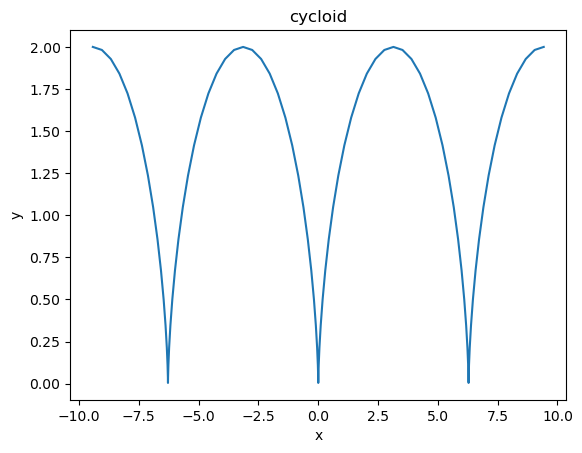

PyObject Text(0.5, 1.0, 'cycloid')

In [47]:
r = 1.0
fx(θ) = r*(θ - sin(θ)) # θ \theta
fy(θ) = r*(1 - cos(θ))
θs = range(-3pi, 3pi, length=100) # pi は円周率π
fig, ax = subplots()
ax.plot(fx.(θs), fy.(θs))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("cycloid")

### Sigmoid function
$$
\rm{sig} (x) = \frac{1}{1 + \exp(-x)}
$$

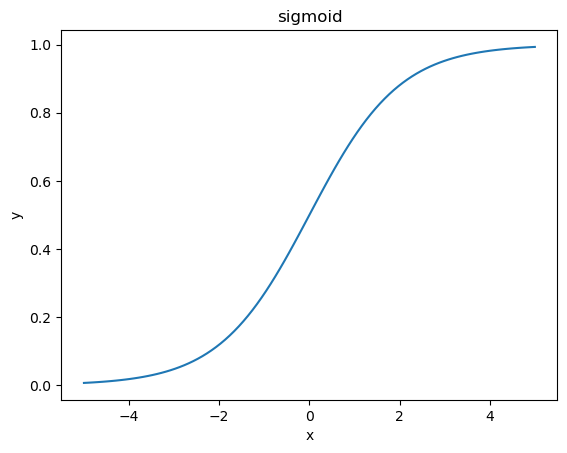

PyObject Text(0.5, 1.0, 'sigmoid')

In [48]:
# Define a sigmoid function
sig(x) = 1 / (1 + exp(-x))

xs = range(-5, 5, length = 100)
fig, ax = subplots()
ax.plot(xs, sig.(xs))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("sigmoid")

### Scatter plot

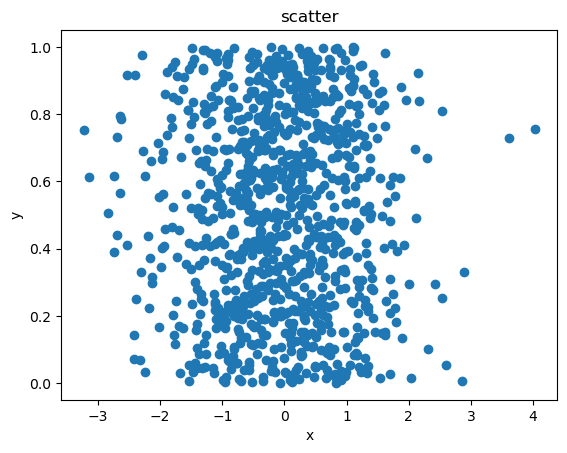

PyObject Text(0.5, 1.0, 'scatter')

In [49]:
# Generate random numbers for visualization
X = randn(1000)
Y = rand(1000)

fig, ax = subplots()

# Alternatively, ax.plot(X, Y, "o")
ax.scatter(X, Y)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("scatter")

### Histogram

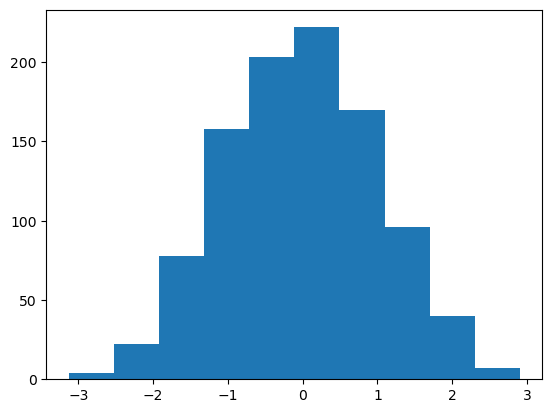

([4.0, 22.0, 78.0, 158.0, 203.0, 222.0, 170.0, 96.0, 40.0, 7.0], [-3.127418527194345, -2.524175092011838, -1.9209316568293315, -1.3176882216468249, -0.714444786464318, -0.11120135128181108, 0.49204208390069537, 1.0952855190832023, 1.6985289542657092, 2.301772389448216, 2.905015824630723], (PyObject <matplotlib.patches.Rectangle object at 0x7fa634e466d0>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634e38760>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634e46b80>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634e46d90>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634e46fa0>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634e591f0>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634e59400>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634e59610>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634e59820>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634e59a30>))

In [51]:
X = randn(1000)
fig, ax = subplots()
ax.hist(X)

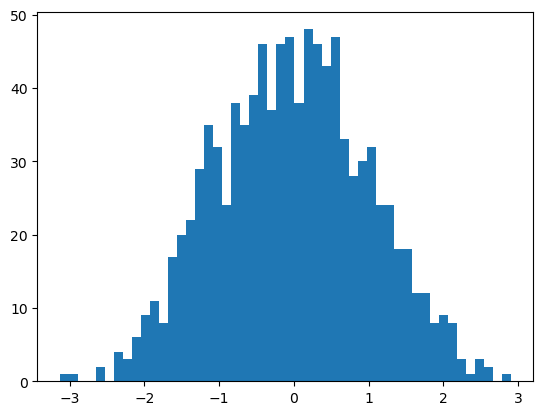

([1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 4.0, 3.0, 6.0, 9.0  …  12.0, 8.0, 9.0, 8.0, 3.0, 1.0, 3.0, 2.0, 0.0, 1.0], [-3.127418527194345, -3.0067698401578435, -2.8861211531213424, -2.765472466084841, -2.6448237790483398, -2.524175092011838, -2.403526404975337, -2.2828777179388355, -2.162229030902334, -2.041580343865833  …  1.8191776413022107, 1.9398263283387123, 2.060475015375214, 2.1811237024117145, 2.301772389448216, 2.4224210764847176, 2.543069763521219, 2.6637184505577207, 2.7843671375942214, 2.905015824630723], (PyObject <matplotlib.patches.Rectangle object at 0x7fa634eb9a90>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634ea8af0>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634eb9f40>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634ec7190>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634ec73a0>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634ec75b0>, PyObject <matplotlib.patches.Rectangle object at 0x7fa634ec77c0>, PyObject <matplotlib.patc

In [52]:
fig, ax = subplots()
ax.hist(X, bins = 50)

### Contour map

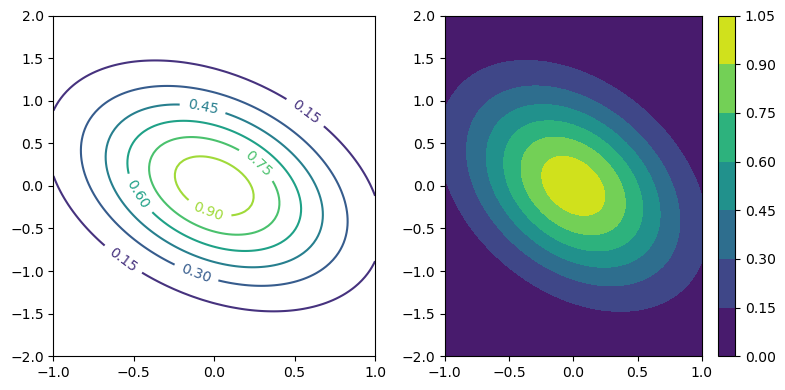

In [57]:
# Define a quadratic function
fz(x, y) = exp(-(2x^2 + y^2 + x*y))

# Defines the visualization range for the x-axis and y-axis
xs = range(-1, 1, length = 100)
ys = range(-2, 2, length = 100)

fig, axes = subplots(1, 2, figsize = (8, 4))

# Number the first subplot
cs = axes[1].contour(xs, ys, fz.(xs', ys))
axes[1].clabel(cs, inline = true)

# Add a colorbar to the second subplot
cs = axes[2].contourf(xs, ys, fz.(xs', ys))
fig.colorbar(cs)

# Auto adjust margin size between subplots
tight_layout()